# Data sourcing

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
%matplotlib inline
import numpy as np
import pandas as pd

## 1️⃣ CSV

In [3]:
track_df = pd.read_csv("data/spotify_2017.csv")
track_df[['name', 'artists']].head()

,name,artists
0,Shape of You,Ed Sheeran
1,Despacito - Remix,Luis Fonsi
2,Despacito (Featuring Daddy Yankee),Luis Fonsi
3,Something Just Like This,The Chainsmokers
4,I'm the One,DJ Khaled


## 2️⃣ API

In [4]:
artist_name = "Ed Sheeran"
song_title = "Shape of you"

In [5]:
from music import fetch_lyrics

In [6]:
fetch_lyrics(artist_name, "Shape of me")

'N/A'

In [7]:
fetch_lyrics(artist_name, song_title)[0:40]

"The club isn't the best place to find a "

In [10]:
for index, row in track_df.iterrows():
    print(row['artists'], row['name'])
    lyrics = fetch_lyrics(row['artists'], row['name'])
    # print(lyrics)
    track_df.loc[index, 'lyrics'] = lyrics

Ed Sheeran Shape of You
Luis Fonsi Despacito - Remix
Luis Fonsi Despacito (Featuring Daddy Yankee)
The Chainsmokers Something Just Like This
DJ Khaled I'm the One
Kendrick Lamar HUMBLE.
Kygo It Ain't Me (with Selena Gomez)
French Montana Unforgettable
Bruno Mars That's What I Like
ZAYN I Don’t Wanna Live Forever (Fifty Shades Darker) - From "Fifty Shades Darker (Original Motion Picture Soundtrack)"
Lil Uzi Vert XO TOUR Llif3
The Chainsmokers Paris
Zedd Stay (with Alessia Cara)
Charlie Puth Attention
Future Mask Off
Post Malone Congratulations
Jason Derulo Swalla (feat. Nicki Minaj & Ty Dolla $ign)
Ed Sheeran Castle on the Hill
Clean Bandit Rockabye (feat. Sean Paul & Anne-Marie)
Imagine Dragons Believer
J Balvin Mi Gente
Imagine Dragons Thunder
James Arthur Say You Won't Let Go
Shawn Mendes There's Nothing Holdin' Me Back
Danny Ocean Me Rehúso
Julia Michaels Issues
Ed Sheeran Galway Girl
Martin Garrix Scared to Be Lonely
The Chainsmokers Closer
Clean Bandit Symphony (feat. Zara Larsson

In [11]:
track_df.head(10)

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,lyrics
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.581000,0.000000,0.0931,0.9310,95.977,233713.0,4.0,The club isn't the best place to find a lover\...
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.229000,0.000000,0.0924,0.8130,88.931,228827.0,4.0,N/A
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.209000,0.000000,0.1120,0.8460,177.833,228200.0,4.0,N/A
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.049800,0.000014,0.1640,0.4460,103.019,247160.0,4.0,I've been reading books of old\nThe legends an...
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.055200,0.000000,0.1670,0.8110,80.924,288600.0,4.0,[DJ Khaled:]\nWe The Best Music\nAnother One!\...
5,7KXjTSCq5nL1LoYtL7XAw,HUMBLE.,Kendrick Lamar,0.904,0.611,1.0,-6.842,0.0,0.0888,0.000259,0.000020,0.0976,0.4000,150.020,177000.0,4.0,"[Music video version:] Wicked or weakness, you..."
6,3eR23VReFzcdmS7TYCrhC,It Ain't Me (with Selena Gomez),Kygo,0.640,0.533,0.0,-6.596,1.0,0.0706,0.119000,0.000000,0.0864,0.5150,99.968,220781.0,4.0,N/A
7,3B54sVLJ402zGa6Xm4YGN,Unforgettable,French Montana,0.726,0.769,6.0,-5.043,1.0,0.1230,0.029300,0.010100,0.1040,0.7330,97.985,233902.0,4.0,"[Swae Lee:]\nIt's not good enough for me, sinc..."
8,0KKkJNfGyhkQ5aFogxQAP,That's What I Like,Bruno Mars,0.853,0.560,1.0,-4.961,1.0,0.0406,0.013000,0.000000,0.0944,0.8600,134.066,206693.0,4.0,"Ay, ay, ay\nI got a condo in Manhattan\nBaby g..."
9,3NdDpSvN911VPGivFlV5d,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,0.735,0.451,0.0,-8.374,1.0,0.0585,0.063100,0.000013,0.3250,0.0862,117.973,245200.0,4.0,N/A


## 3️⃣ SQL

In [12]:
import sqlite3

In [13]:
conn = sqlite3.connect('data/music.sqlite')

In [14]:
# db = conn.cursor()

In [15]:
limit = "500000"
query = """
    SELECT ai.artist_mb, p.listeners_lastfm 
    FROM artist_info ai 
    JOIN popularity p ON ai.mbid = p.mbid
    WHERE p.listeners_lastfm > ?
"""

In [16]:
# db.execute(query, (limit,))

In [17]:
# db.fetchall()[0:10]

In [18]:
listens_df = pd.read_sql(query, conn, params=(limit,))

In [19]:
listens_df.head()

,artist_mb,listeners_lastfm
0,Coldplay,5381567.0
1,Radiohead,4732528.0
2,Red Hot Chili Peppers,4620835.0
3,Rihanna,4558193.0
4,Eminem,4517997.0


In [20]:
track_df = track_df.merge(
    listens_df,
    left_on="artists",
    right_on="artist_mb",
    how="left"
)

In [21]:
track_df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,lyrics,artist_mb,listeners_lastfm
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0,The club isn't the best place to find a lover\...,Ed Sheeran,1620379.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0,N/A,NaN,NaN
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0,N/A,NaN,NaN
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0,I've been reading books of old\nThe legends an...,The Chainsmokers,794664.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0,[DJ Khaled:]\nWe The Best Music\nAnother One!\...,DJ Khaled,1160535.0


## 4️⃣ Google BigQuery

In [22]:
!pip install --quiet pandas-gbq


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python3.8 -m pip install --upgrade pip


In [23]:
import pandas_gbq

In [27]:
project_id = 'lwt-data-lectures' # TODO: replace with your own!
sql = """
    SELECT artist_name, COUNT(*) track_count
    FROM `listenbrainz.listen` 
    WHERE listened_at BETWEEN "2017-01-01" AND "2018-01-01"
    GROUP BY artist_name
    HAVING track_count > 1000
    ORDER BY track_count DESC
"""
music_brainz_df = pandas_gbq.read_gbq(sql, project_id=project_id)

Downloading: 100%|███████████████| 2708/2708 [00:00<00:00, 5842.16rows/s]


In [28]:
music_brainz_df

,artist_name,track_count
0,Radiohead,64411
1,Kendrick Lamar,50870
2,The Beatles,43591
3,Gorillaz,42124
4,Linkin Park,38435
...,...,...
2703,Mimi Page,1006
2704,LE$,1005
2705,Damu The Fudgemunk,1005
2706,"Crosby, Stills, Nash & Young",1002


In [29]:
track_df = track_df.merge(
    music_brainz_df,
    left_on="artists",
    right_on="artist_name",
    how="left"
)

In [30]:
track_df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,lyrics,artist_mb,listeners_lastfm,artist_name,track_count
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,...,0.0931,0.931,95.977,233713.0,4.0,The club isn't the best place to find a lover\...,Ed Sheeran,1620379.0,Ed Sheeran,20413.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,...,0.0924,0.813,88.931,228827.0,4.0,N/A,NaN,NaN,Luis Fonsi,2444.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,...,0.1120,0.846,177.833,228200.0,4.0,N/A,NaN,NaN,Luis Fonsi,2444.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,...,0.1640,0.446,103.019,247160.0,4.0,I've been reading books of old\nThe legends an...,The Chainsmokers,794664.0,The Chainsmokers,13941.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,...,0.1670,0.811,80.924,288600.0,4.0,[DJ Khaled:]\nWe The Best Music\nAnother One!\...,DJ Khaled,1160535.0,DJ Khaled,3243.0


## 5️⃣ Scraping

In [31]:
import requests
from bs4 import BeautifulSoup
import re

In [32]:
def scrape(artist):
    url = f"https://en.wikipedia.org/wiki/{artist.replace(' ', '_')}"
    try:
        html_raw = requests.get(url).content
        soup = BeautifulSoup(html_raw, "html.parser")
        bday = soup.find("span", class_="bday").string
        return str(bday)
    except:
        return "Inconclusive"

In [33]:
scrape("Ed Sheeran")

'1991-02-17'

In [35]:
for index, row in track_df.iterrows():
    # print(row['artists'], row['name'])
    bday = scrape(row['artists'])
    # print(lyrics)
    track_df.loc[index, 'bday'] = bday

In [40]:
track_df.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,...,tempo,duration_ms,time_signature,lyrics,artist_mb,listeners_lastfm,artist_name,track_count,bday,birthday
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,...,95.977,233713.0,4.0,The club isn't the best place to find a lover\...,Ed Sheeran,1620379.0,Ed Sheeran,20413.0,Inconclusive,NaT
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,...,88.931,228827.0,4.0,N/A,NaN,NaN,Luis Fonsi,2444.0,Inconclusive,NaT
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,...,177.833,228200.0,4.0,N/A,NaN,NaN,Luis Fonsi,2444.0,Inconclusive,NaT
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,...,103.019,247160.0,4.0,I've been reading books of old\nThe legends an...,The Chainsmokers,794664.0,The Chainsmokers,13941.0,1985-05-16,1985-05-16
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,...,80.924,288600.0,4.0,[DJ Khaled:]\nWe The Best Music\nAnother One!\...,DJ Khaled,1160535.0,DJ Khaled,3243.0,1975-11-26,1975-11-26


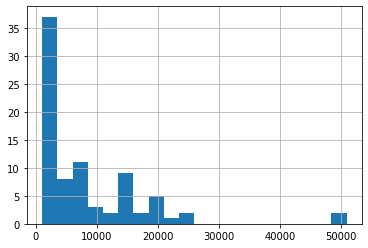

In [41]:
track_df["track_count"].hist(bins = 20);

In [42]:
import re
pattern = r'\d{4}-\d{2}-\d{2}'
# Find only the rows that have valid birthdays
only_bdays = track_df[track_df["bday"].str.match(pattern)].copy()
# Convert to a datetime format
track_df["birthday"] = pd.to_datetime(only_bdays["bday"])

<AxesSubplot:xlabel='birthday', ylabel='listeners_lastfm'>

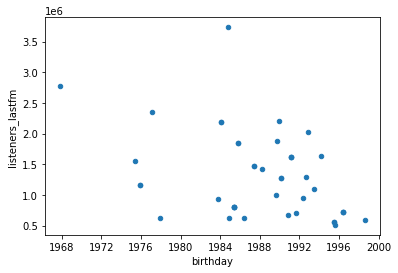

In [43]:
track_df.plot.scatter("birthday", "listeners_lastfm")